| | |
|:----------|:----------|
| Name      | Bayesian Modeling Version 2|
| Notebook  | Metropolis Sampler for Normal Model|
| Author    | Joshuah Touyz, PhD |
| Version   | 0.2 |
|Last update| 11/10/20 |

In [1]:
import numpy as np
import pandas as pd
import plotnine as pn
from scipy.stats import norm

In [6]:
# Metropolis sampler for posterior Gamma

# Utility functions
rnorm = lambda: np.random.normal(scale = 0.25, size = 1)
cdfnorm = lambda l,s: norm.cdf(0,loc = l, scale = s)
runif = lambda: np.random.uniform(size = 1)

# Set seed
np.random.seed(123)

# Set constants
n = 5
n_iter = 20000
x = np.random.poisson(lam = 10, size = n) #true values
alpha = 1;beta = 1
alpha_prime = (sum(x) + alpha - 1) # same as n\bar(x) + alpha - 1
beta_prime = (beta + n)

# Initial value 
lambda_p = np.ones(n_iter) # pre-allocating values of lambda
lambda_p[0] = np.mean(x) - 5

In [7]:
# Setting up the sampler

for i in range(1, n_iter):
    # Setting up proposal
    lambda_proposal = lambda_p[i-1] + rnorm()

    # Boundary correction
    while(lambda_proposal<0):
        lambda_proposal = lambda_p[i-1]+rnorm()

    # Accept/reject criteria
    a = alpha_prime*(np.log(lambda_proposal) - np.log(lambda_p[i-1])) - \
        beta_prime * (lambda_proposal - lambda_p[i-1])

    boundary_correction = a + np.log(1- cdfnorm(lambda_p[i-1],1))\
                            - np.log(1-cdfnorm(lambda_proposal,1))

    log_u = np.log(runif())

    if (min(a,0) > log_u):
        # Accept sample
        lambda_p[i] = lambda_proposal
    else:
        # Reject sample
        lambda_p[i] = lambda_p[i-1]
    
lambda_p = pd.DataFrame(lambda_p).rename({0:'values'}, axis = 1)

In [8]:
# Comaring this to the posterior Gamma (analytic form)
d = np.random.gamma(shape = alpha_prime + 1, scale = 1/beta_prime, size = n_iter)
d = pd.DataFrame({'values':d})

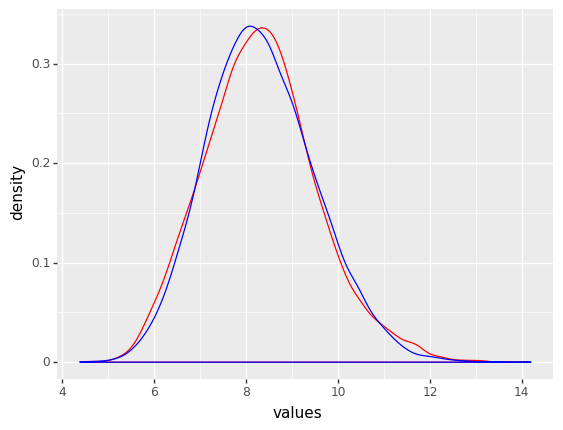

<ggplot: (336279037)>

In [9]:
pn.ggplot(pn.aes(x = 'values'), data = lambda_p) + pn.geom_density(color = 'red')\
    + pn.geom_density(pn.aes(x = 'values'), data = d, color = 'blue')